In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns


In [15]:
df = pd.read_csv(r'/content/merch_sales.csv')
df


,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,65,1,65,4,The product was affordable here compared to ot...
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,158,1,158,4,Exquisite craftsmanship here is absolutely app...
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,45,1,45,2,Waste of Money.
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,23,1,23,5,The product was affordable here compared to ot...


In [16]:
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [17]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Product ID,0
Product Category,0
Buyer Gender,0
Buyer Age,0
Order Location,0
International Shipping,0
Sales Price,0
Shipping Charges,0


In [18]:
df['Buyer Gender'] = df['Buyer Gender'].map({'Male': 1, 'Female': 0})
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,1,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,1,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,0,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,1,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,0,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


In [19]:
df['International Shipping'] = df['International Shipping'].map({'Yes': 1, 'No': 0})


In [20]:
X = df[['Buyer Age', 'Sales Price', 'Shipping Charges', 'Quantity', 'Total Sales']]
y = df['International Shipping']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred = lr_model.predict(X_test)

In [25]:
accuracy =accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [26]:
precision =precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 1.0000


In [27]:
recall= recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 1.0000


In [28]:
f1_score = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_score:.4f}")

F1 Score: 1.0000


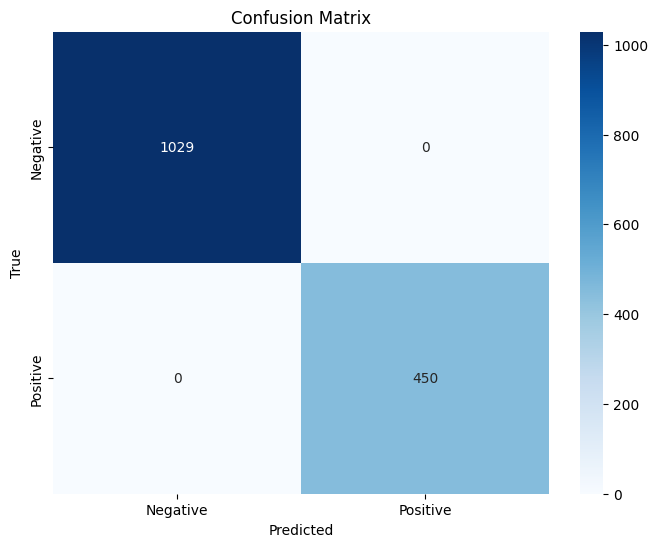

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00       450

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479

